Tutorial 4: Planes
==================

We've learnt how to make galaxy objects out of `LightProfile`'s and `MassProfile`'s. Now, we'll use these galaxies to
make a strong-gravitational lens.

For newcomers to lensing, a strong gravitational lens is a system where two (or more) galaxies align perfectly down our
line of sight, such that the foreground `Galaxy`'s mass (represented as `MassProfile`'s) deflects the light (represented
as `LightProfile`'s) of the background source galaxy(s).

When the alignment is just right and the lens is just massive enough, the background source galaxy appears multiple
times. The schematic below shows such a system, where two light-rays from the source are bending
around the lens galaxy and into the observer (light should bend smoothly)

![Schematic of Gravitational Lensing](https://i.imgur.com/zB6tIdI.jpg)

As an observer, we don't see the source's true appearance (e.g. a round blob of light). Instead, we only observe its 
light after it is deflected and lensed by the foreground `Galaxy`'s mass. In this exercise, we'll make a source galaxy 
image whose light has been deflected by a lens galaxy.

In the schematic above, we used the terms `Image-Plane` and `Source-Plane`. In lensing speak, a `plane` is a 
collection of galaxies at the same redshift (that is, parallel to one another down our line-of-sight). Therefore:

- If two or more lens galaxies are at the same redshift in the image-plane, they deflect light in the same way. 
This means we can sum the convergences, potentials and deflection angles of their `MassProfile`'s.

- If two or more source galaxies are at the same redshift in the source-plane, their light is ray-traced in the same 
way. Therefore, when determining their lensed images, we can sum the lensed images of each `Galaxy`'s `LightProfile`'s.

So, lets do it - lets use the `plane` module in AutoLens to create a strong lensing system like the one pictured above. 
For simplicity, we'll assume 1 lens galaxy and 1 source galaxy.

In [1]:
#%matplotlib inline
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


As always, we need a `Grid2D`, where our `Grid2D` is the coordinates we `trace` from the image-plane to the source-plane in 
the lensing configuration above. Our `Grid2D` is therefore no longer just a `grid`, but an image-plane `Grid2D` representing 
our image-plane coordinates. Thus, lets name as such.

In [2]:
image_plane_grid = al.Grid2D.uniform(
    shape_native=(100, 100), pixel_scales=0.05, sub_size=1
)

Whereas before we called our `Galaxy`'s things like `galaxy_with_light_profile`, lets now refer to them by their role 
in lensing, e.g. `lens_galaxy` and `source_galaxy`.

In [3]:
mass_profile = al.mp.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.6)

lens_galaxy = al.Galaxy(redshift=0.5, mass=mass_profile)

light_profile = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

source_galaxy = al.Galaxy(redshift=1.0, bulge=light_profile)

Lets setup our image-plane using a `Plane` object. This `Plane` takes the lens galaxy we made above.

In [4]:
image_plane = al.Plane(galaxies=[lens_galaxy])

Just like we did with `Galaxy`'s we can compute quantities from the `Plane` by passing it a `Grid2D`.

In [5]:
deflections = image_plane.deflections_from_grid(grid=image_plane_grid)

print("deflection-angles of `Plane`'s `Grid2D` pixel 0:")
print(deflections.native[0, 0, 0])
print(deflections.native[0, 0, 0])

print("deflection-angles of `Plane`'s `Grid2D` pixel 1:")
print(deflections.native[0, 1, 1])
print(deflections.native[0, 1, 1])

deflection-angles of `Plane`'s `Grid2D` pixel 0:
1.1313708498984762
1.1313708498984762
deflection-angles of `Plane`'s `Grid2D` pixel 1:
-1.1197679539495438
-1.1197679539495438


_Plane_ mat_plot_2d exist, which work analogously to `Profile` mat_plot_2d and `Galaxy` mat_plot_2d.

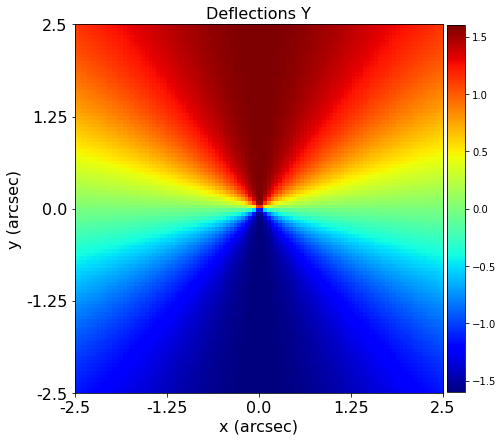

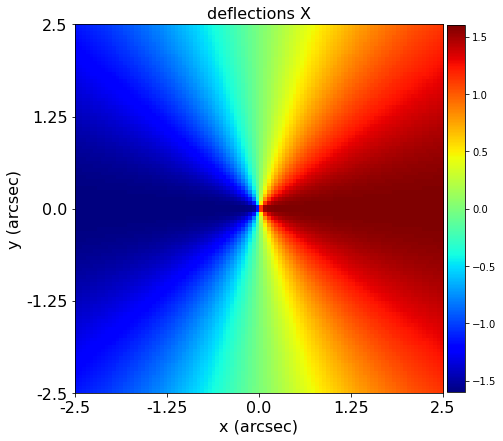

In [6]:
plane_plotter = aplt.PlanePlotter(plane=image_plane, grid=image_plane_grid)
plane_plotter.figures(deflections_y=True, deflections_x=True)

Throughout this chapter, we plotted lots of deflection angles. However, if you are not familiar with strong lensing, 
you probably weren`t entirely sure what they are actually used for. 

The deflection angles tell us how light is `lensed` by a lens galaxy. By taking the image-plane coordinates and 
deflection angles, we can subtract the two to determine the source-plane`s lensed coordinates, e.g.

source_plane_coordinates = image_plane_coordinates - image_plane_deflection_angles

Therefore, we can use our image_plane to `trace` its `Grid2D` to the source-plane...

In [7]:
source_plane_grid = image_plane.traced_grid_from_grid(grid=image_plane_grid)
print("Traced source-plane coordinates of `Grid2D` pixel 0:")
print(source_plane_grid.native[0, 0, :])
print("Traced source-plane coordinates of `Grid2D` pixel 1:")
print(source_plane_grid.native[0, 1, :])

Traced source-plane coordinates of `Grid2D` pixel 0:
[ 1.34362915 -1.34362915]
Traced source-plane coordinates of `Grid2D` pixel 1:
[ 1.33214405 -1.30523205]


... and use this `Grid2D` to setup the source-plane

In [8]:
source_plane = al.Plane(galaxies=[source_galaxy])

Lets inspect our `Grid2D`'s - I bet our source-plane isn't the boring uniform `Grid2D` we plotted in the first tutorial!

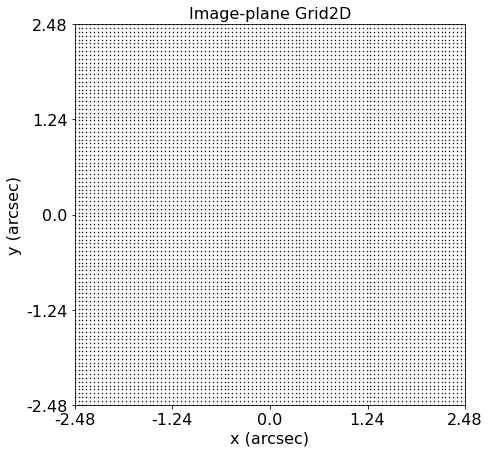

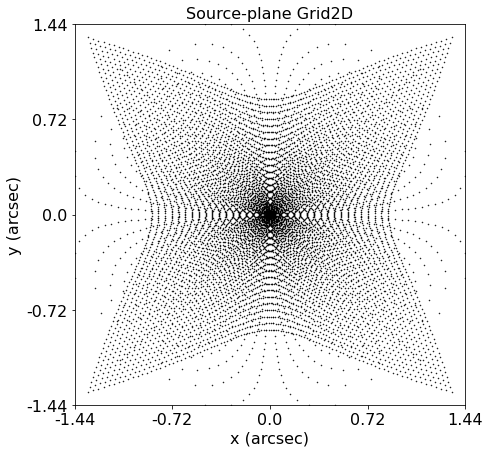

In [9]:
mat_plot_2d = aplt.MatPlot2D(title=aplt.Title(label="Image-plane Grid2D"))

plane_plotter = aplt.PlanePlotter(
    plane=image_plane, grid=image_plane_grid, mat_plot_2d=mat_plot_2d
)
plane_plotter.figures(plane_grid=True)

mat_plot_2d = aplt.MatPlot2D(title=aplt.Title(label="Source-plane Grid2D"))

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, mat_plot_2d=mat_plot_2d
)
plane_plotter.figures(plane_grid=True)

We can zoom in on the `centre` of the source-plane (remembering the lens galaxy was centred at (0.1", 0.1")).

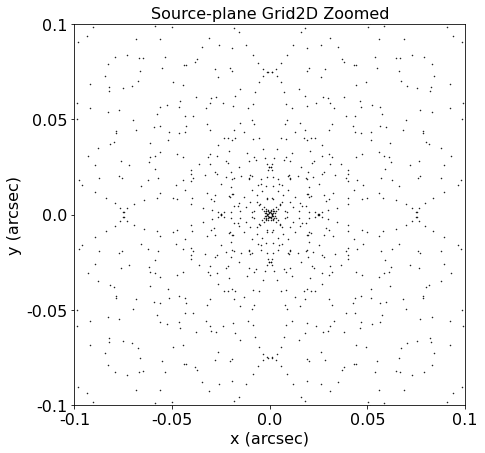

In [10]:
mat_plot_2d = aplt.MatPlot2D(
    title=aplt.Title(label="Source-plane Grid2D Zoomed"),
    axis=aplt.Axis(extent=[-0.1, 0.1, -0.1, 0.1]),
)

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, mat_plot_2d=mat_plot_2d
)

plane_plotter.figures(plane_grid=True)

We can also plot both `Plane`'s next to one another, and highlight specific points. This means we can see how different 
image pixels map to the source-plane (and visa versa).

(We are inputting the indexes of the `Grid2D` into `indexes` - the first set of indexes go from 0 -> 50, which is the top 
row of the image-grid running from the left - as we said it would!)

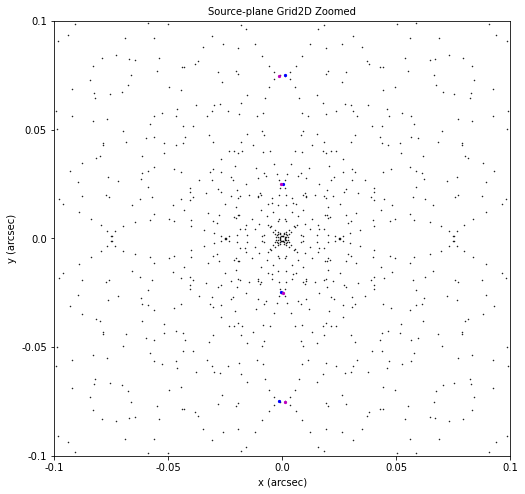

In [11]:
visuals_2d = aplt.Visuals2D(
    indexes=[
        range(0, 50),
        range(500, 550),
        [1350, 1450, 1550, 1650, 1750, 1850, 1950, 2050, 2150, 2250],
        [6250, 8550, 8450, 8350, 8250, 8150, 8050, 7950, 7850, 7750],
    ]
)

plane_plotter = aplt.PlanePlotter(
    plane=image_plane,
    grid=image_plane_grid,
    visuals_2d=visuals_2d,
    mat_plot_2d=mat_plot_2d,
)
plane_plotter.subplot_with_source_grid()

Clearly, the source-plane`s `Grid2D` is very different to the image-planes! It's not uniform and its certainly not boring!

We can now ask the question - `what does our source-galaxy look like in the image-plane`? That is, to us, the observer 
on Earth, how does the source-galaxy appear after lensing?. To do this, we simple trace the source galaxy's light 
back from the source-plane grid.

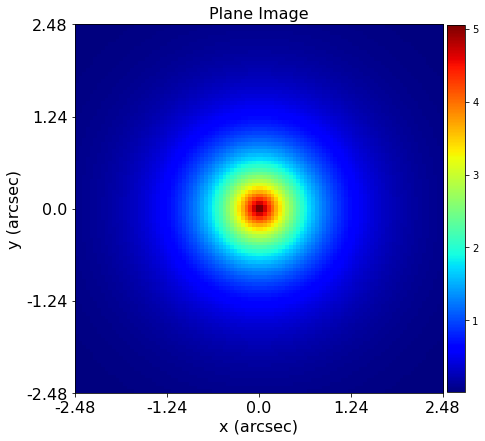

In [12]:
plane_plotter = aplt.PlanePlotter(plane=source_plane, grid=source_plane_grid)
plane_plotter.figures(plane_image=True)

It's a rather spectacular ring of light, but why is it a ring? Well:

- Our lens galaxy was centred at (0.0", 0.0").
- Our source-galaxy was centred at (0.0", 0.0").
- Our lens galaxy had a spherical `MassProfile`.
- Our source-galaxy a spherical `LightProfile`.

Given the perfect symmetry of the system, every path the source's light takes around the lens galaxy is radially 
identical. Thus, nothing else but a ring of light can form!

This is called an 'Einstein Ring' and its radius is called the 'Einstein Radius', which are both named after the man 
who famously used gravitational lensing to prove his theory of general relativity.

Finally, because we know our source-`Galaxy`'s `LightProfile`, we can also plot its `plane-image`. This image is how the 
source intrinsically appears in the source-plane (e.g. without lensing). This is a useful thing to know, because the 
source-s light is highly magnified, meaning astronomers can study it in a lot more detail than would otherwise be 
possible!

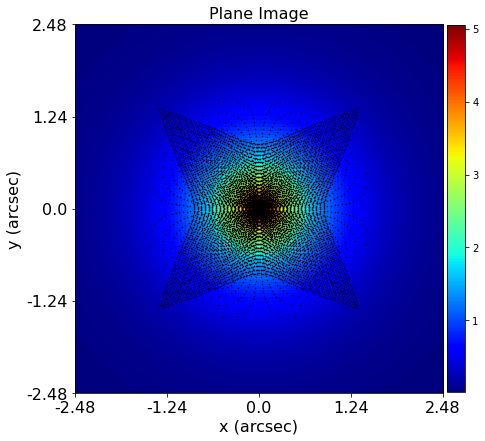

In [13]:
include_2d = aplt.Include2D(grid=True)

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, include_2d=include_2d
)
plane_plotter.figures(plane_image=True)

Plotting the `Grid2D` over the plane image obscures its appearance, which isn't ideal. We can of course 
tell **PyAutoLens** not to plot the grid.

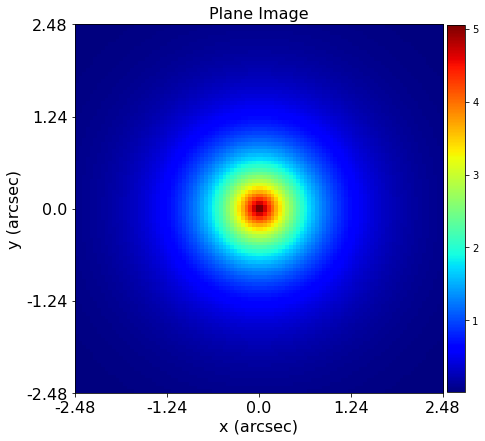

In [14]:
include_2d = aplt.Include2D(grid=False)

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, include_2d=include_2d
)
plane_plotter.figures(plane_image=True)

For `MassProfile`'s, you can also plot their 'critical curves', which for those unfamiliar with lensing are lines of 
infinite magnification where the `MassProfile` perfectly `focuses` light rays. Source light near a critical curve 
appears much brighter than its true luminosity!

In the next tutorial, we'll also plot the 'caustics', which are the 'critical_curves' mapped to the source-plane.
        
You may be surprised that the inner critical curve does not appear symmetric, but instead is a non-circular jagged 
shape. This is a numerical issue with the way that **PyAutoLens** computes the critical curve, without this issue
both would appear perfect symmetric and smooth! Implementing a more robust calculation of these quantities is on the
**PyAutoLens** feature list, but for now you'll just have to accept this aspect of the visualization is sub-optimal!

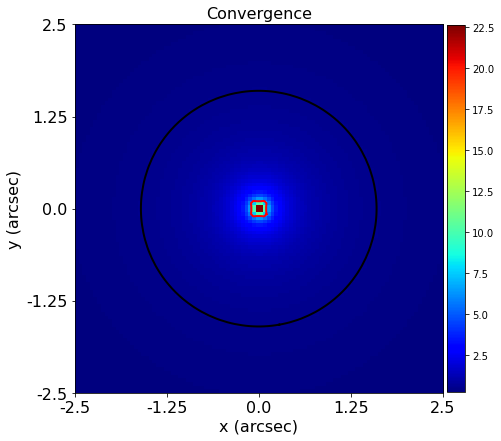

In [15]:
include_2d = aplt.Include2D(critical_curves=True)

plane_plotter = aplt.PlanePlotter(
    plane=image_plane, grid=image_plane_grid, include_2d=include_2d
)
plane_plotter.figures(convergence=True)

And, we're done. This is the first tutorial covering strong-lensing and I highly recommend you take a moment to really 
mess about with the code above to see what sort of lensed images you can form. Pay attention to the source-plane `Grid2D` - 
its appearance can change a lot!

In particular, try:

 1) Changing the lens galaxy's einstein radius - what happens to the source-plane`s image?

 2) Change the SphericalIsothermal `MassProfile` to an `EllipticalIsothermal` `MassProfile`.and set its axis_ratio to 0.8. 
 What happens to the number of source images?

 3) As discussed at the beginning, `Plane`'s can be composed of multiple galaxies. Make an the image-plane with two 
 galaxies and see how multi-galaxy lensing leads to crazy source images. Also try making a source-plane with two 
 galaxies!

Finally, if you are a newcomer to strong lensing, it might be worth reading briefly about some strong lensing theory. 
Don't worry about maths, and equations, and anything scary, but you should at least go to Wikipedia to figure out:

 - What a critical line is.
 - What a caustic is.
 - What determines the image multiplicity of the lensed source.